In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json 
import re

In [2]:
csv_path = "/Users/ltaing/Documents/SIMPLON DATA IA/TITRE PRO/PROJET CD/data/df_marmiton.csv"
data = pd.read_csv(csv_path)

In [89]:
import pandas as pd
marmiton = pd.read_json("/Users/ltaing/Downloads/recipe1M_layers/layer1.json")
marmiton.head()

ingredients  \
0  [{'text': '6 ounces penne'}, {'text': '2 cups ...   
1  [{'text': '1 c. elbow macaroni'}, {'text': '1 ...   
2  [{'text': '8 tomatoes, quartered'}, {'text': '...   
3  [{'text': '2 12 cups milk'}, {'text': '1 12 cu...   
4  [{'text': '1 (3 ounce) package watermelon gela...   

                                                 url partition  \
0  http://www.epicurious.com/recipes/food/views/-...     train   
1  http://cookeatshare.com/recipes/dilly-macaroni...     train   
2  http://www.foodnetwork.com/recipes/gazpacho1.html     train   
3  http://www.food.com/recipe/crunchy-onion-potat...      test   
4  http://www.food.com/recipe/cool-n-easy-creamy-...     train   

                                title          id  \
0          Worlds Best Mac and Cheese  000018c8a5   
1         Dilly Macaroni Salad Recipe  000033e39b   
2                            Gazpacho  000035f7ed   
3           Crunchy Onion Potato Bake  00003a70b1   
4  Cool 'n Easy Creamy Watermelon Pie  00004320bb   

                                        instructions  
0  [{'text': 'Preheat the oven to 350 F. Butter o...  
1  [{'text': 'Cook macaroni according to package ...  
2  [{'text': 'Add the tomatoes to a food processo...  
3  [{'text': 'Preheat oven to 350 degrees Fahrenh...  
4  [{'text': 'Dissolve Jello in boiling water.'},...

In [3]:
import pandas as pd
marmiton = pd.read_json("marmiton.json")
marmiton.head()

titles  total_times  \
0  Croissants au boudin et √† la compote de pommes...           35   
1                             Bouch√©es √† la crevette           10   
2                                 Verrine d'avoblanc           15   
3                         Verrine de saumon en gel√©e           60   
4                   Empanada au thon et aux poivrons           45   

          yields                                        ingredients  \
0  10 serving(s)  ['1 p√¢tes feuillet√©es', '2 pommes', '1/2 cuill...   
1   1 serving(s)                      ["d'", '1 carr√© frais', 'de']   
2   6 serving(s)  ["1 cuill√®re √† soupe de huile d'olive", '1 avo...   
3   4 serving(s)  ['20 g de raifort r√¢p√©', '1 citron', '1 oeuf',...   
4   4 serving(s)  ['1 rouleau de p√¢te feuillet√©e', '1 dosette de...   

                                        instructions  \
0  Pr√©parer une compote, en coupant les pommes en...   
1  Malaxer 1 carr√© frais avec les crevettes finem...   
2  Ecraser l'avocat en pur√©e puis assaisonner, m√©...   
3  Faire cuire 1 oeuf dur, l'√©plucher, et le pile...   
4  Coupez les poivrons en deux et nettoyez-les.\n...   

                                              images         hosts  \
0  https://assets.afcdn.com/recipe/20100120/20869...  marmiton.org   
1  https://assets.afcdn.com/recipe/20100101/recip...  marmiton.org   
2  https://assets.afcdn.com/recipe/20100101/recip...  marmiton.org   
3  https://assets.afcdn.com/recipe/20100101/recip...  marmiton.org   
4  https://assets.afcdn.com/recipe/20131024/34549...  marmiton.org   

                                               links  
0  [{'href': 'https://marmiton.onelink.me/1630811...  
1  [{'href': 'https://marmiton.onelink.me/1630811...  
2  [{'href': 'https://marmiton.onelink.me/1630811...  
3  [{'href': 'https://marmiton.onelink.me/1630811...  
4  [{'href': 'https://marmiton.onelink.me/1630811...

In [4]:
marmiton['instructions'][0]

'Pr√©parer une compote, en coupant les pommes en petits morceaux, le sucre, et 2 ou 3 cuill√®res √† soupe d\'eau pour qu\'elles ne caram√©lisent pas.\nEn fin de cuisson, rajouter le Calvados, et 3 ou 4 tours de moulin de poivre; et laisser sur le feu quelques minutes suppl√©mentaires.\nEcraser la compote √† la fourchette, s\'il reste trop de gros morceaux, mais il ne faut pas qu\'elle soit trop "lisse" quand m√™me.\nEtaler (ou d√©rouler) la p√¢te feuillet√©e.\nLa d√©couper en 10 portions (comme on d√©couperait une tarte).\nSur chaque base du triange, d√©poser 1 cuill√®re √† caf√© de compote et un petit morceau de boudin, sans trop s\'approcher des bords.\nRouler la p√¢te assez serr√©, en prenant soin que la garniture ne se fasse pas la malle.\nFermer bien les extr√©mit√©s, et ramener les bouts pour former un croissant.\nRenouveler l\'op√©ration pour les 9 autres portions.\nDisposer sur une plaque, et mettre √† four chaud (th 7-210¬∞C), pendant 15 √† 20 min.\nA mi-cuisson, les badigeonn

In [5]:
test = marmiton['ingredients'][0].replace("'", '').replace('[', '').replace(']', '').replace('"', '')
print(test)

1 p√¢tes feuillet√©es, 2 pommes, 1/2 cuill√®res √† soupe de sucre, poivre, 1 cuill√®res √† soupe de calvados, 50 g de boudin noir, 1 jaunes doeuf


In [6]:
test2 = marmiton['ingredients'][0]
res = test2.split(", ")
print(test2)
print(res)

['1 p√¢tes feuillet√©es', '2 pommes', '1/2 cuill√®res √† soupe de sucre', 'poivre', '1 cuill√®res √† soupe de calvados', '50 g de boudin noir', "1 jaunes d'oeuf"]
["['1 p√¢tes feuillet√©es'", "'2 pommes'", "'1/2 cuill√®res √† soupe de sucre'", "'poivre'", "'1 cuill√®res √† soupe de calvados'", "'50 g de boudin noir'", '"1 jaunes d\'oeuf"]']


In [7]:
bilan = test.split(", ")
print(bilan)
print(type(bilan))

['1 p√¢tes feuillet√©es', '2 pommes', '1/2 cuill√®res √† soupe de sucre', 'poivre', '1 cuill√®res √† soupe de calvados', '50 g de boudin noir', '1 jaunes doeuf']
<class 'list'>


In [27]:
stri_clen = re.sub(r"[[']",' ', marmiton['ingredients'][2])
print(stri_clen)
stri_clen = clean_line(stri_clen)
print(stri_clen)

 "1 cuill√®re √† soupe de huile d olive",  1 avocat ,  150 g de mascarpone ,  2 cuill√®res √† soupe de cr√®me fra√Æche ]
1 cuill re soupe de huile d olive , 1 avocat , 150 g de mascarpone , 2 cuill res soupe de cr me fra che


In [7]:
marmiton['ingredients'] = marmiton['ingredients'].str.replace("'", ' ')
marmiton['ingredients'] = marmiton['ingredients'].str.replace('[', '')
marmiton['ingredients'] = marmiton['ingredients'].str.replace(']', '')
marmiton['ingredients'] = marmiton['ingredients'].str.replace('"', '')
marmiton['ingredients'] = marmiton['ingredients'].str.replace('d ', "d'")
marmiton['ingredients'] = marmiton['ingredients'].str.replace('l ', "l'")

marmiton['ingredients'] = marmiton['ingredients'].str.split(", ")
print(type(marmiton['ingredients'][0]))
print(marmiton['ingredients'][0])

<class 'list'>
[' 1 p√¢tes feuillet√©es ', ' 2 pommes ', ' 1/2 cuill√®res √† soupe de sucre ', ' poivre ', ' 1 cuill√®res √† soupe de calvados ', ' 50 g de boudin noir ', "1 jaunes d'oeuf"]


In [62]:
#marmiton['id'] = marmiton.index + 100

In [8]:
marmiton.insert(0, 'id', range(1, 1 + len(marmiton)))

In [9]:
marmiton.head()

id                                             titles  total_times  \
0   1  Croissants au boudin et √† la compote de pommes...           35   
1   2                             Bouch√©es √† la crevette           10   
2   3                                 Verrine d'avoblanc           15   
3   4                         Verrine de saumon en gel√©e           60   
4   5                   Empanada au thon et aux poivrons           45   

          yields                                        ingredients  \
0  10 serving(s)  [ 1 p√¢tes feuillet√©es ,  2 pommes ,  1/2 cuill...   
1   1 serving(s)                        [d',  1 carr√© frais ,  de ]   
2   6 serving(s)  [1 cuill√®re √† soupe de huile d'olive,  1 avoca...   
3   4 serving(s)  [ 20 g de raifort r√¢p√© ,  1 citron ,  1 oeuf ,...   
4   4 serving(s)  [ 1 rouleau de p√¢te feuillet√©e ,  1 dosette de...   

                                        instructions  \
0  Pr√©parer une compote, en coupant les pommes en...   
1  Malaxer 1 carr√© frais avec les crevettes finem...   
2  Ecraser l'avocat en pur√©e puis assaisonner, m√©...   
3  Faire cuire 1 oeuf dur, l'√©plucher, et le pile...   
4  Coupez les poivrons en deux et nettoyez-les.\n...   

                                              images         hosts  \
0  https://assets.afcdn.com/recipe/20100120/20869...  marmiton.org   
1  https://assets.afcdn.com/recipe/20100101/recip...  marmiton.org   
2  https://assets.afcdn.com/recipe/20100101/recip...  marmiton.org   
3  https://assets.afcdn.com/recipe/20100101/recip...  marmiton.org   
4  https://assets.afcdn.com/recipe/20131024/34549...  marmiton.org   

                                               links  
0  [{'href': 'https://marmiton.onelink.me/1630811...  
1  [{'href': 'https://marmiton.onelink.me/1630811...  
2  [{'href': 'https://marmiton.onelink.me/1630811...  
3  [{'href': 'https://marmiton.onelink.me/1630811...  
4  [{'href': 'https://marmiton.onelink.me/1630811...

In [10]:
for line in marmiton['ingredients']:
    print(line)

[' 1 p√¢tes feuillet√©es ', ' 2 pommes ', ' 1/2 cuill√®res √† soupe de sucre ', ' poivre ', ' 1 cuill√®res √† soupe de calvados ', ' 50 g de boudin noir ', "1 jaunes d'oeuf"]
["d'", ' 1 carr√© frais ', ' de ']
["1 cuill√®re √† soupe de huile d'olive", ' 1 avocat ', ' 150 g de mascarpone ', ' 2 cuill√®res √† soupe de cr√®me fra√Æche ']
[' 20 g de raifort r√¢p√© ', ' 1 citron ', ' 1 oeuf ', "50 g d'oeufs de saumon", ' 1 sachet de gel√©e ', ' 120 g de saumon frais ']
[' 1 rouleau de p√¢te feuillet√©e ', ' 1 dosette de safran ', " 1 bo√Æte de thon au naturel'", ' 1 poivron rouge et 1 poivron vert ', ' 1 oignon ', ' 2 oeufs ']
[' 1 bouteilles de champagne ', "12 cl'de jus d'ananas", " 25 cl'de cl√©mentine ", " 5 cl'de rhum blanc ou brun ", ' 1 traits de cognac (optionnel) ', ' 1 gingembre frais ', ' 1 b√¢tons de cannelle ', ' 1 anis √©toil√© ', ' 1 citrons verts ', ' 1 gousses de vanille ']
[' 25 g de chorizo doux ', " 1 cuill√®re √† caf√© de persil'hach√© ", ' 3 pinc√©es de piments de Caye

[' 1/2 kg de chou noir ', ' 400 g de haricot ', ' 1 c√©leri ', "1 gousses d'ail", ' 1 thym ', ' tomate ', " sel'", ' piment ']
[' 2 carottes ', ' 4 poireaux ', ' 4 tranches de pains ', ' 200 g de gorgonzola ', ' 1 oignon ', ' 4 cuill√®res √† soupe de cr√®me fra√Æche √©paisse ', ' 1 oeuf ']
[' 1 brocolis (environ 750 g en entier) ', ' 1 carottes ', ' 1 navets ', ' 2 pommes de terre de moyenne taille ', ' 2 √©chalotes ', ' lardons fum√©s (environ 100 g) ', "50 cl'd'eau", ' 1 cubes de bouillon de boeuf ', " 30 cl'de lait (variable selon la liquidit√© voulue de la soupe) "]
[' 750 g de pommes de terre ', "2 gousses d'ail", "6 cuill√®res √† soupe de huile d'olive", "2.5 l'd'eau", ' 400 g de choux vert portugais ou chou fris√© ', ' 1 oignon ', ' 1 saucisson fum√© portugais ', "1 poign√©e d'olives noires"]
["1 l'd'eau", "700 g d'endives (ou 4 gros chicons)", ' 275 g de pommes de terre ', ' 60 g de parmesan r√¢p√© ', ' 200 g de lardons ', ' 1.5 morceau de sucre ', " 15 cl'de cr√®me fra√Æche "]

["1 Foie gras cru (achetez-le de pr√©f√©rence surgel√© vous aurez la certitude qu il'est tr√®s frais)"]
[' 1 kg de champignon de Paris ', ' 1 bo√Æte de concentr√© de tomates ', " 25 cl'de vin blanc ", " 2 ml'de tabasco "]
[' 1 carotte (sinon 2) ', ' 1 bouillon de volaille ', ' 1 cuill√®re √† soupe de coriandre (surgel√©) ', ' 1/2 cuill√®re √† caf√© de muscade ', ' 1 pinc√©e de cannelle ', "4 cuill√®res √† soupe de huile d'olive", "3/4 l'd'eau", ' 1 patate douce ', ' 1/2 potimarron ', ' 1 oignon rouge ', " 4 cl'de sauce soja "]
[' 25 g de beurre ', ' 2 oignons ', ' 8 carottes ', " 1 fenouil'", "8 poires d'hiver", ' 5 pommes de terre ', ' herbes du jardin (persil', 'ou ciboulette', 'ou cerfeuil) ', ' 1 pinc√©es de curry ', ' 1 pinc√©es de gingembre moulu ', ' 5 cubes de bouillon de poule ']
['']
["3 l'd'eau", ' 1 cube de bouillon ', ' 3 pommes de terre ', ' 200 g de lardons ', ' 150 g de champignons ', " 50 cl'de lait (Ou de cr√®me fraiche liquide) ", ' 1 kg de brocoli ', ' 2 oignons ']


["3 gousses d'ail", ' 1 piment frais (Cayenne) ', ' 1 gingembre frais ', ' 2 verres de vin blanc ', ' 1 bo√Æte de tomates concass√©es ', "1 trait de huile d'olive ou une bonne noix de beurre", '2 crabes ou √©trilles de 300 g chacun', "ou 1 gros (endormis au frigo 1h √† l'avance)", ' 1 kg de moules de bouchot ', ' 1 √©chalote ', ' 1 oignon ', ' 1 feuille de laurier ']
["3 gousses d'ail", ' 4 poivrons (vert', 'rouge', 'jaune', 'orange) ', ' 4 tomates de taille moyenne ', ' 6 champignons de taille moyenne ', ' 1 bo√Æte de concentr√© de tomates (70 g) ', ' 1 oignon ', ' 500 g de poulets ', ' 1 brocoli ', " 25 cl'de cr√®me fra√Æche all√©g√©e "]
[' 8 filets de poulet de 150 g ', ' 1 oignons ', ' 2 carottes ', ' 1 poivrons rouges ', ' ciboulette ', " 15 cl'de vin de blanc ", " 15 cl'de lait ", " 80 cl'de bouillon de poule (au d√©part de cube et de poudre) ", ' 1 bouquets garnis (queue de persil', 'thym', 'laurier) ', ' g de beurre et 10 g de farine ', " 200 g de fromage ail'et fines herbes ",

[' 200 g de riz ', ' 2 oeufs ', " 200 g de lard'frais (ou de jambon en allumettes) ", ' 1 poivrons rouges ', ' 2 bananes ', "1 petites bo√Ætes d'ananas au sirop", ' 1 oignons ', ' 50 g de beurre ']
[' 1 paquet de pain de mie aux c√©r√©ales ', ' 5 champignons ', ' 1 paquet de tofu fum√© ', ' 2 oignons ', ' 1 paquet de gruy√®re r√¢p√© ']
["4 tranches d'espadon ", 'coup√©es en 2 dans la longueur', ' 150 g de mozzarella ', ' 8 tranches fines de jambon cru ou de pays ', ' parmesan r√¢p√© ', ' 50 g de beurre ', "feuille d'estragon et un peu de persil'plat frais", ' 1 petits verres de vin blanc sec ', "1 gousses d'ail", ' farine (1 poign√©e) ', ' poivre blanc ']
[' 1 poulets (de pr√©f√©rence fermier bien √©videmment) ', " 1 l'de bouillon de poule ou du bouillon maison ", ' 1 bouquets garnis (thym', 'laurier etc...) ']
[' 180 g de farine ', ' 6 tranches de jambon cuit ', ' 250 g de champignon de Paris ', ' 3 √©chalotes ', ' 100 g de beurre ', ' 3 oeufs ', "jaune d'oeuf", " 75 cl'de lait ", " 2

[' 160 g de riz complet ', "2 cuill√®res √† soupe de huile d'olive", ' 2 carottes ', " 1 pinc√©e de sel'", ' 1 pinc√©e de poivre ', ' 1/2 cuill√®re √† caf√© de muscade ', ' 80 g de prot√©ines de soja textur√©es ', ' 4 cuill√®res √† soupe de cr√®me fra√Æche liquide (all√©g√©e possible) ', ' 1 oignon ']
[' 2 cuill√®res √† soupe de huile de s√©same ', " 1 grosse cuill√®re √† soupe de miel'toutes fleurs ", ' 1.5 cuill√®re √† caf√© de quatre-√©pices ', ' 1 vin blanc de cuisine ', ' 4 cailles ', ' 2 √©chalotes ', ' 1 petit suisse nature ', ' 2 cuill√®res √† soupe de sauce soja ', ' 4 mandarines ']
[' 350 g de tagliatelles ', ' 1 louche de bouillon ', ' 2 petites cuill√®res de parmesan r√¢p√© ', "500 g d'√©pinards", ' 1 oignon ', "2 filets d'anchois"]
[' 150 g de farine ', ' 1 sachet de levure ', ' 200 g de poulets r√¥ti ', ' 200 g de l√©gumes de printemps', '1 poign√©e de haricots verts', '1 carotte nouvelle', '1 poign√©e de pois gourmands', '2 petits navets ', ' 3 oeufs ', " 13 cl'de lait √

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
def clean_ingredient():
    # Convert str ingredient to list
    marmiton['ingredients'] = marmiton['ingredients'].str.replace("'", ' ')
    marmiton['ingredients'] = marmiton['ingredients'].str.replace('[', '')
    marmiton['ingredients'] = marmiton['ingredients'].str.replace(']', '')
    marmiton['ingredients'] = marmiton['ingredients'].str.replace('"', '')
    marmiton['ingredients'] = marmiton['ingredients'].str.replace('d ', "d'")
    marmiton['ingredients'] = marmiton['ingredients'].str.replace('l ', "l'")

    marmiton['ingredients'] = marmiton['ingredients'].str.split(", ")
    print(type(marmiton['ingredients'][0]))
    print(marmiton['ingredients'][0])
    return marmiton['ingredients']

In [5]:
def clean_line(line):
    '''
    Args:
        line: a string, such as food name, sentences...
    '''
    assert type(line) == str
    
    # all lowercase
    line = line.lower()
    line = line.replace(' .', '.')
    line = line.replace(' !', '!')
    line = line.replace('*', '')
    line = line.replace('..', '.')
    line = line.replace(' - ', '')
    
    # only reserve number and alphabets
    line = re.sub(r'[^a-z0-9\u00C0-\u00FF+()/?!.,]', ' ', line)
    
    # replace things in brace
    line = re.sub(r'\([^)]*\)', '', line)
    
    # remove extra spaces
    line = re.sub(' +',' ',line).strip()
    return line

In [24]:
ingredients_list = []
for i in range(len(marmiton)):
    ingredients_str = clean_line(marmiton['ingredients'][i])
    ingredients_split = list(ingredients_str.split(","))
    ingredients_list.append(ingredients_split)

In [10]:
print(ingredients_list[1500])
print(len(ingredients_list))
print(type(ingredients_list))

['200 g de farine ', ' 1 sachet de levure chimique ', ' 12 cl de huile d olive ', ' 15 cl de vin blanc sec ', ' 150 g de lardons fum√©s ', ' 4 oeufs ', ' 200 g de gruy√®re r√¢p√© ', ' 2 oignons']
24956
<class 'list'>


In [ ]:
start_with = [' tbsp ',' pkt ',' g de ',' tsp ',' x ',' cups ',' oz ',' mrs ',' can ',
              ' lb ', ' pkg ',' tbsp ',' lbs ',' qt ',' lrg ',' grams ',' sm ',
              ' cans  ',' bottle ',' and ',' cubes ',' o ',' , ',' handful ',
              ' container ',' t ',' bag ',' gram ',' jar ',' c ',' lg ',' ounces ',' ounce ',' box ',
              ' cl de ', ' pinc√©es de ', ' cuill√®re √† caf√© de ', ' rouleau de ', ' cuill√®res √† soupe de ',
              ' cuill√®re de '," g d'", " cl d'"," l d'"," l de ",' ml de ', ' tasses de ',' paquet de ',
              ' verres de ', ' tranches de ',' pinc√©es de ', ' petits pots de ', '¬Æ',' ¬Æ', ' bo√Ætes de ',
              ' boules de ', ' branches de ', ' sachets de ',' de d√©s de ', ' tranches de ', ' bottes de ',
              ' filets de ', ' s', ' jus de ', ' √©goutt√©es et coup√©es en rondelles ',
              'en bo√Æte bien √©goutt√© et grossi√®rement √©miett√©', '(ou bleu pour un go√ªt moins prononc√©)', ' (1 mesure=1 verre)',
              '(prendre une forme adapt√©e', 'demandez conseil √† votre boulanger)', 'par personne', 'cubes de',
              'briquettes de']

In [115]:
start_with = [' tbsp ',' pkt ',' g de ',' tsp ',' x ',' cups ',' oz ',' mrs ',' can ',
              ' lb ', ' pkg ',' tbsp ',' lbs ',' qt ',' lrg ',' grams ',' sm ',
              ' cans  ',' bottle ',' and ',' cubes ',' o ',' , ',' handful ',
              ' container ',' t ',' bag ',' gram ',' jar ',' c ',' lg ',' ounces ',' ounce ',' box ',
              
              ' cl de ', ' pinc√©es de ', ' cuill√®re √† caf√© de ', ' rouleau de ', ' cuill√®res √† soupe de ',
              ' cuill√®re de '," g d'", " cl d'"," l d'"," l de ",' ml de ', ' tasses de ',' paquet de ',
              ' verres de ', ' tranches de ',' pinc√©es de ', ' petits pots de ', '¬Æ',' ¬Æ', ' bo√Ætes de ',
              ' boules de ', ' branches de ', ' sachets de ',' de d√©s de ', ' tranches de ', ' bottes de ',
              ' filets de ', ' s', ' jus de ', ' √©goutt√©es et coup√©es en rondelles ',
              'en bo√Æte bien √©goutt√© et grossi√®rement √©miett√©', '(ou bleu pour un go√ªt moins prononc√©)', ' (1 mesure=1 verre)',
              '(prendre une forme adapt√©e', 'demandez conseil √† votre boulanger)', 'par personne', 'cubes de',
              'briquettes de']

In [126]:
start_with = ['kg de','ml de','cl de','pinc√©es de','cuill√®re √† caf√© de','rouleau de','cuill√®res √† soupe de',
              'cuill√®re de',"g d'","cl d'", "l d'",'l de','tasses de','paquet de',
              'verres de', 'tranches de','pinc√©es de','petits pots de','¬Æ','bo√Ætes de','boules de','branches de',
              'sachets de','de d√©s de','tranches de','bottes de','filets de','jus de',
              '√©goutt√©es et coup√©es en rondelles','en bo√Æte bien √©goutt√© et grossi√®rement √©miett√©',
              '(ou bleu pour un go√ªt moins prononc√©)','(1 mesure=1 verre)','prendre une forme adapt√©e',
              'demandez conseil √† votre boulanger','par personne','cubes de','briquettes de', 'g de', 'cl de',
              'sachet de',"ml d'", 'pots de']

and_start_with = ["g d'","cl d'", "l d'",' ¬Æ',
              '(ou bleu pour un go√ªt moins prononc√©)','(1 mesure=1 verre)','prendre une forme adapt√©e',
              'demandez conseil √† votre boulanger',"ml d'"]


def clean_prefix(ingr):
    
    assert type(ingr) == str
    
    # all lowercase
    ingr = ingr.lower()
    ingr = ingr.replace(' .', '.')
    ingr = ingr.replace(' !', '!')
    ingr = ingr.replace('*', '')
    ingr = ingr.replace('..', '.')
    ingr = ingr.replace(' - ', '')
    
    # only reserve number and alphabets
    ingr = re.sub(r'[^a-z0-9\u00C0-\u00FF+()/?!.,]', ' ', ingr)
    
    # replace things in brace
    ingr = re.sub(r'\([^)]*\)', '', ingr)

    # strip
    ingr = re.sub(' +',' ',ingr).strip()

    # remove number
    #ingr = re.sub(r'\d+', '', ingr)
    
    ingr = re.sub(r'/', '', ingr)
    ingr = re.sub(r'[0-9]+', '', ingr)
    ingr = re.sub(r' d ', " d'", ingr)
    

    # remove period
    ingr = ingr.replace('.', '')

    # remove prefixes
    ingr = re.sub("kg d'",' ', ingr)
        
    for prefix in start_with:
        ingr = re.sub(prefix+'\s','', ingr)
        ingr = re.sub('^\s'+prefix+'\s','', ingr)
        
    for prefix in and_start_with:
        ingr = re.sub(prefix,'', ingr)

    # strip again
    ingr = re.sub(' +',' ',ingr).strip()

    return ingr

In [127]:
ingredients_clean = []
for i in range(len(marmiton)):
    ingredients_str = clean_prefix(marmiton['ingredients'][i])
    ingredients_split = list(ingredients_str.split(","))
    ingredients_clean.append(ingredients_split)

print(ingredients_list[1500])
print('############')
print(ingredients_clean[1500])

['200 g de farine ', ' 1 sachet de levure chimique ', ' 12 cl de huile d olive ', ' 15 cl de vin blanc sec ', ' 150 g de lardons fum√©s ', ' 4 oeufs ', ' 200 g de gruy√®re r√¢p√© ', ' 2 oignons']
############
['farine ', ' levure chimique ', " huile d'olive ", ' vin blanc sec ', ' lardons fum√©s ', ' oeufs ', ' gruy√®re r√¢p√© ', ' oignons']


In [128]:
print(ingredients_list[1589])
print('############')
print(ingredients_clean[1589])

['150 g de farine ', ' 1 sachet de levure ', ' 100 ml de lait ', ' 1 cuill√®re √† soupe d huile ', ' 250 g de potiron √©pluch√© ', ' 4 oeufs ', ' 75 g de gruy√®re r√¢p√© ', ' 150 g de bleu d auvergne']
############
['farine ', ' levure ', ' lait ', " cuill√®re √† soupe d'huile ", ' potiron √©pluch√© ', ' oeufs ', ' gruy√®re r√¢p√© ', " bleu d'auvergne"]


In [129]:
l1 = []
for elem in ingredients_clean[1500]:
    l1.extend(elem.strip().split(';'))
    
print(l1)

['farine', 'levure chimique', "huile d'olive", 'vin blanc sec', 'lardons fum√©s', 'oeufs', 'gruy√®re r√¢p√©', 'oignons']


In [130]:
print(ingredients_list[8])
print('############')
print(ingredients_clean[8])

['250 g d olives noires sans noyaux √† la grecque ', ' 60 g de c√¢pres ', ' 60 g d anchois ', ' 6 cl d huile d olive ', ' 2 citrons ', ' 1 branches de thym ', ' 1 pinc√©es d ail moulu']
############
['olives noires sans noyaux √† la grecque ', ' c√¢pres ', ' anchois ', " huile d'olive ", ' citrons ', ' thym ', " pinc√©es d'ail moulu"]


In [131]:
l1 = []
for i in range(len(ingredients_clean)):
    for elem in ingredients_clean[i]:
        l1.extend(elem.strip().split(';'))

print(l1[2])

sucre


In [ ]:
'ksucre en morceaux',
"jaunes d'oeuf + lait",
"c√©drats ou d'orange confite",
'kchou fleur en fleurettes surgel√©',


In [92]:
l2 = []
for i in range(len(ingredients_list)):
    for elem in ingredients_list[i]:
        l2.extend(elem.strip().split(';'))
l2_unique = list(set(l2))
l2_unique

['',
 '2 cuill√®res √† caf√© de coriandre moulue',
 '1 p√¢te sabl√©e toute pr√™te ou maison',
 '1 cuill√®re de vin blanc',
 '100 g de parmesan du fromager',
 '1 cr√®me chantilly ou des grains de sucre',
 '100 g de rhubarbe en morceaux',
 '1/2 l de bouillon de volaille l√©ger en go√ªt',
 '1 court bouillon pour poissons',
 '1 cuill√®res √† soupe de herbes de provence',
 '1 cuill√®res √† caf√© de persil',
 '150 g de lard de poitrine',
 'grill√©es',
 '180 g de p√¢tes',
 '2 bananes bien m√ªres',
 '2 cuill√®res √† soupe de tahini',
 '5 tranches de mie de pain',
 '1 cuill√®res √† caf√© de tabasco',
 '10 cl d huile d olive + 1 cuill√®re √† soupe',
 '100 g de fromages de ch√®vre frais',
 '150 g de brioches rassie',
 '500 g de poisson de mer genre mulet',
 '1 cuill√®re √† soupe de fromage frais',
 '3 √©chalotes selon la taille',
 '50 g de boursin',
 '100 g de margarine',
 '500 g de concentr√© de tomates',
 '1.5 kg de sucre cristallis√©',
 '1 pot de pur√©e de pommes sans sucre ajout√©',
 '2 feuil

In [132]:
l1_unique = list(set(l1))
l1_unique

['',
 'vin blanc sec et fruit√©',
 'praires',
 'courgettes de cm de long',
 'grill√©es',
 'bouquets de fines herbes',
 "cubes d'ail persil",
 'cuill√®re √† soupe de riz',
 'maquereau fum√© au poivre',
 'etc',
 'poivre √† volont√©',
 'saucisses italiennes douces',
 'chocolat noir √† de cacao',
 "jaunes d'oeuf + lait",
 'grosse cuill√®re √† soupe de fond de veau',
 "c√©drats ou d'orange confite",
 'escalope de porc maigre',
 'feuilles de noyer',
 'cuill√®res √† caf√© de piment doux de cayenne',
 'boule de mozzarella enti√®re',
 'brioches parisiennes',
 'chocolat p√¢tissier cors√©',
 "gousse d'ail √† volont√©",
 'demis de yaourt nature',
 'p√¢tes fra√Æches de pr√©f√©rence des penne',
 'bouillon d√©graiss√©s',
 'poires m√ªres √† point',
 'c√©leri r√¢p√© non assaisonn√©',
 'yaourt nature bien froid',
 'beurre demi sel froid',
 'feuilles de menthe environ',
 "sucre vanill√© ou quelques gouttes d'ar√¥me de vanille",
 'en fonction de la taille',
 'miel ou de sucre brun',
 'sanglier coup√© en c

In [33]:
'demi verre de ',' fra√Æche avec ses tiges ',' cuill√®res de ', '',
'ou ml ', ' de cm de long', 'grill√©es','bouquets de ',
"cubes d'",'cuill√®re √† soupe de ', 'etc', 'praires', ' fum√© au poivre',
' √† volont√©', ' italiennes douces',' √† de cacao',
'grosse cuill√®re √† soupe de ', 'cuill√®res √† caf√© de ', 'boule de ',
' enti√®re', ' surgel√©', ' cors√©', 'demis de ', ' pinc√©e de sesel', 'froid', 
"de √† cm d'√©paisseur", ' ros√©',' pour g√¢teau',' effil√©es et grill√©es',
' de table',' pour',"belle branche d'",' que vous hacherez tr√®s finement ou que vous √©craserez',
' sans la peau',' moyennes √©pluch√©es et coup√©es en',' coup√©es en morceaux cuites pr√©alablement √† la vapeur',
' au moins',' frais',' mille fleurs',' ou plus',' de savoie','eau avec ',' en grains',
' de g','cuill√®res √† caf√© de ',' cors√© type sidi brahim ou vins du sud ouest fran√ßais qui vont bien',
'tasse de ',' coup√© en d√©s',' pour la garniture','bo√Æte de ','barquette de ',' de soja go√ªt vanille',
"petite bo√Æte d'",''


['1 p√¢tes feuillet√©es ', ' 2 pommes ', ' 1/2 cuill√®res √† soupe de sucre ', ' poivre ', ' 1 cuill√®res √† soupe de calvados ', ' 50 g de boudin noir ', ' 1 jaunes d oeuf']
############
['p√¢tes feuillet√©es ', ' pommes ', ' sucre ', ' poivre ', ' calvados ', ' boudin noir ', " jaunes d'oeuf"]


In [40]:
#ingredients_clean = []
#for i in range(len(ingredients_list)):
#    cleaning_list = clean_prefix(ingredients_list[i])
#    cleaning_lists_split = list(cleaning_list.split(","))
#    ingredients_clean.append(cleaning_lists_split)
#print(ingredients_list[1500])
#print('############')
#print(ingredients_clean[1500])

In [43]:
flat_list = [item for sublist in ingredients_clean for item in sublist]
print(flat_list[0])

p√¢tes feuillet√©es 


In [44]:
ingredient_unique = list(set(flat_list))
ingredient_unique

['',
 ' miech√¢taigne ',
 ' oeuf entier + jaunes ',
 ' deau ti√®de ',
 ' √©chalote fra√Æche avec ses tiges ',
 ' cuill√®res de p√¢te de curry jaune ',
 ' carottes r√¢p√©es',
 ' pommes coup√©es en petits morceaux ',
 ' tranches fines de jambon serrano ',
 " p√¢te d'amande marron ",
 ' fromage blanc tr√®s √©goutt√© ',
 'demi verre de porto blanc ',
 ' champignon noir d√©j√† d√©coup√©s en fines lamelles ',
 ' gouttes de colorant alimentaire rose ',
 'blanc de poulet ',
 ' tomates coup√©es en morceaux ',
 ' hach√© ou ml s√©ch√© ',
 " blancs d'oeuf en neige",
 'sabl√©s √©cras√©s ',
 'etc',
 ' fromage frais individuel type saint mor√™t ',
 'mac√©doine de l√©gumes surgel√©s ',
 ' navet rond ',
 ' thym et de la sauge ',
 ' s√©same dor√©es ',
 'sucre roux ou glace ',
 ' pot de fromage ail et fines herbes sp√©cial cuisine ',
 ' et coup√© en parts √©gales ',
 ' cuisses de grenouille ',
 ' laurier',
 " cuill√®re √† caf√© d'√©pices au moringa ",
 ' r√¥ti de veau',
 ' gorgonzola bien persill√© ',
 '

cuill√®re √† soupe de huile d'olive , avocat , mascarpone , cr√®me fra√Æche


In [9]:
# importing the module
import json
  
# Opening JSON file
with open('marmiton.json') as json_file:
    data = json.load(json_file)
  
    # Print the type of data variable
    print("Type:", type(data))
  
    # Print the data of dictionary
    print('Example object:\n', data[0], '\n')
    print("title", data[0]['titles'], '\n')
    print("ingredients:", data[0]['ingredients'], '\n')
    print("instructions:", data[0]['instructions'])

Type: <class 'list'>
Example object:
 {'titles': 'Croissants au boudin et √† la compote de pommes poivr√©e(37√®me rencontre)', 'total_times': 35, 'yields': '10 serving(s)', 'ingredients': '[\'1 p√¢tes feuillet√©es\', \'2 pommes\', \'1/2 cuill√®res √† soupe de sucre\', \'poivre\', \'1 cuill√®res √† soupe de calvados\', \'50 g de boudin noir\', "1 jaunes d\'oeuf"]', 'instructions': 'Pr√©parer une compote, en coupant les pommes en petits morceaux, le sucre, et 2 ou 3 cuill√®res √† soupe d\'eau pour qu\'elles ne caram√©lisent pas.\nEn fin de cuisson, rajouter le Calvados, et 3 ou 4 tours de moulin de poivre; et laisser sur le feu quelques minutes suppl√©mentaires.\nEcraser la compote √† la fourchette, s\'il reste trop de gros morceaux, mais il ne faut pas qu\'elle soit trop "lisse" quand m√™me.\nEtaler (ou d√©rouler) la p√¢te feuillet√©e.\nLa d√©couper en 10 portions (comme on d√©couperait une tarte).\nSur chaque base du triange, d√©poser 1 cuill√®re √† caf√© de compote et un petit morceau

In [10]:
def recipe_validate_required_fields(recipe):
    required_keys = ['titles', 'ingredients', 'instructions']
    
    if not recipe:
        return False
    
    for required_key in required_keys:
        if not recipe[required_key]:
            return False
        
        if type(recipe[required_key]) == list and len(recipe[required_key]) == 0:
            return False
    
    return True

In [11]:
dataset_validated = [recipe for recipe in data if recipe_validate_required_fields(recipe)]
print(len(dataset_validated))

24955


In [12]:
STOP_WORD_TITLE = 'üìó '
STOP_WORD_INGREDIENTS = '\nü•ï\n\n'
STOP_WORD_INSTRUCTIONS = '\nüìù\n\n'

In [13]:
def recipe_to_string(recipe):
    # This string is presented as a part of recipes so we need to clean it up.
    
    title = recipe['titles']
    ingredients = recipe['ingredients']
    instructions = recipe['instructions'].split('\n')
    
    ingredients_string = ''
    for ingredient in ingredients:
        #if ingredient:
        ingredients_string += f'‚Ä¢ {ingredient}\n'
    
    instructions_string = ''
    for instruction in instructions:
        if instruction:
            instructions_string += f'‚ñ™Ô∏é {instruction}\n'
    
    return f'{STOP_WORD_TITLE}{title}\n{STOP_WORD_INGREDIENTS}{ingredients_string}{STOP_WORD_INSTRUCTIONS}{instructions_string}'

In [14]:
dataset_stringified = [recipe_to_string(recipe) for recipe in dataset_validated]

In [15]:
print('Stringified dataset size: ', len(dataset_stringified))

Stringified dataset size:  24955


In [16]:
for recipe_index, recipe_string in enumerate(dataset_stringified[:3]):
    print('Recipe #{}\n---------'.format(recipe_index + 1))
    print(recipe_string)
    print('\n')

Recipe #1
---------
üìó Croissants au boudin et √† la compote de pommes poivr√©e(37√®me rencontre)

ü•ï

‚Ä¢ [
‚Ä¢ '
‚Ä¢ 1
‚Ä¢  
‚Ä¢ p
‚Ä¢ √¢
‚Ä¢ t
‚Ä¢ e
‚Ä¢ s
‚Ä¢  
‚Ä¢ f
‚Ä¢ e
‚Ä¢ u
‚Ä¢ i
‚Ä¢ l
‚Ä¢ l
‚Ä¢ e
‚Ä¢ t
‚Ä¢ √©
‚Ä¢ e
‚Ä¢ s
‚Ä¢ '
‚Ä¢ ,
‚Ä¢  
‚Ä¢ '
‚Ä¢ 2
‚Ä¢  
‚Ä¢ p
‚Ä¢ o
‚Ä¢ m
‚Ä¢ m
‚Ä¢ e
‚Ä¢ s
‚Ä¢ '
‚Ä¢ ,
‚Ä¢  
‚Ä¢ '
‚Ä¢ 1
‚Ä¢ /
‚Ä¢ 2
‚Ä¢  
‚Ä¢ c
‚Ä¢ u
‚Ä¢ i
‚Ä¢ l
‚Ä¢ l
‚Ä¢ √®
‚Ä¢ r
‚Ä¢ e
‚Ä¢ s
‚Ä¢  
‚Ä¢ √†
‚Ä¢  
‚Ä¢ s
‚Ä¢ o
‚Ä¢ u
‚Ä¢ p
‚Ä¢ e
‚Ä¢  
‚Ä¢ d
‚Ä¢ e
‚Ä¢  
‚Ä¢ s
‚Ä¢ u
‚Ä¢ c
‚Ä¢ r
‚Ä¢ e
‚Ä¢ '
‚Ä¢ ,
‚Ä¢  
‚Ä¢ '
‚Ä¢ p
‚Ä¢ o
‚Ä¢ i
‚Ä¢ v
‚Ä¢ r
‚Ä¢ e
‚Ä¢ '
‚Ä¢ ,
‚Ä¢  
‚Ä¢ '
‚Ä¢ 1
‚Ä¢  
‚Ä¢ c
‚Ä¢ u
‚Ä¢ i
‚Ä¢ l
‚Ä¢ l
‚Ä¢ √®
‚Ä¢ r
‚Ä¢ e
‚Ä¢ s
‚Ä¢  
‚Ä¢ √†
‚Ä¢  
‚Ä¢ s
‚Ä¢ o
‚Ä¢ u
‚Ä¢ p
‚Ä¢ e
‚Ä¢  
‚Ä¢ d
‚Ä¢ e
‚Ä¢  
‚Ä¢ c
‚Ä¢ a
‚Ä¢ l
‚Ä¢ v
‚Ä¢ a
‚Ä¢ d
‚Ä¢ o
‚Ä¢ s
‚Ä¢ '
‚Ä¢ ,
‚Ä¢  
‚Ä¢ '
‚Ä¢ 5
‚Ä¢ 0
‚Ä¢  
‚Ä¢ g
‚Ä¢  
‚Ä¢ d
‚Ä¢ e
‚Ä¢  
‚Ä¢ b
‚Ä¢ o
‚Ä¢ u
‚Ä¢ d
‚Ä¢ i
‚Ä¢ n
‚Ä¢  
‚Ä¢ n
‚Ä¢ o
‚Ä¢ i
‚Ä¢ r
‚Ä¢ '
‚Ä¢ ,
‚Ä¢  
‚Ä¢ "
‚Ä¢ 1
‚Ä¢  
‚Ä¢ j
‚Ä¢ a
‚Ä¢ u
‚Ä¢ n
‚Ä¢ e
‚Ä¢ s
‚Ä¢  

In [17]:
def recipe_to_string(recipe):
    # This string is presented as a part of recipes so we need to clean it up.
    
    title = recipe['titles']
    ingredients_replace = recipe['ingredients'].replace("'", '').replace('[', '').replace(']', '').replace('"', '')
    ingredients = ingredients_replace.split(", ")
    instructions = recipe['instructions'].split('\n')
    
    ingredients_string = ''
    for ingredient in ingredients:
        #if ingredient:
        ingredients_string += f'‚Ä¢ {ingredient}\n'
    
    instructions_string = ''
    for instruction in instructions:
        if instruction:
            instructions_string += f'‚ñ™Ô∏é {instruction}\n'
    
    return f'{STOP_WORD_TITLE}{title}\n{STOP_WORD_INGREDIENTS}{ingredients_string}{STOP_WORD_INSTRUCTIONS}{instructions_string}'

In [18]:
dataset_stringified = [recipe_to_string(recipe) for recipe in dataset_validated]

In [19]:
for recipe_index, recipe_string in enumerate(dataset_stringified[:3]):
    print('Recipe #{}\n---------'.format(recipe_index + 1))
    print(recipe_string)
    print('\n')

Recipe #1
---------
üìó Croissants au boudin et √† la compote de pommes poivr√©e(37√®me rencontre)

ü•ï

‚Ä¢ 1 p√¢tes feuillet√©es
‚Ä¢ 2 pommes
‚Ä¢ 1/2 cuill√®res √† soupe de sucre
‚Ä¢ poivre
‚Ä¢ 1 cuill√®res √† soupe de calvados
‚Ä¢ 50 g de boudin noir
‚Ä¢ 1 jaunes doeuf

üìù

‚ñ™Ô∏é Pr√©parer une compote, en coupant les pommes en petits morceaux, le sucre, et 2 ou 3 cuill√®res √† soupe d'eau pour qu'elles ne caram√©lisent pas.
‚ñ™Ô∏é En fin de cuisson, rajouter le Calvados, et 3 ou 4 tours de moulin de poivre; et laisser sur le feu quelques minutes suppl√©mentaires.
‚ñ™Ô∏é Ecraser la compote √† la fourchette, s'il reste trop de gros morceaux, mais il ne faut pas qu'elle soit trop "lisse" quand m√™me.
‚ñ™Ô∏é Etaler (ou d√©rouler) la p√¢te feuillet√©e.
‚ñ™Ô∏é La d√©couper en 10 portions (comme on d√©couperait une tarte).
‚ñ™Ô∏é Sur chaque base du triange, d√©poser 1 cuill√®re √† caf√© de compote et un petit morceau de boudin, sans trop s'approcher des bords.
‚ñ™Ô∏é Rouler la p√¢te a

In [20]:
print(dataset_stringified[15840])

üìó Curry de congre

ü•ï

‚Ä¢ 1/2 gousse dail
‚Ä¢ 1 pomme
‚Ä¢ 1 citron
‚Ä¢ 1 cuill√®re √† soupe de noix de coco rap√©e
‚Ä¢ 1 cuill√®re √† soupe de curry en poudre
‚Ä¢ 15 cl de vin blanc sec
‚Ä¢ 2 cuill√®res √† soupe de huile dolive
‚Ä¢ 800 g de congre sans ar√™tes ni peau
‚Ä¢ 2 oignons selon grosseur
‚Ä¢ 10 cl de cr√®me fra√Æche liquide
‚Ä¢ 1 yaourt go√ªt bulgare
‚Ä¢ 50 g darachides sal√©es
‚Ä¢ 1/2 tablette de court-bouillon

üìù

‚ñ™Ô∏é Faire pr√©parer le poisson par votre poissonnier.
‚ñ™Ô∏é Epluchez 1 pomme, les oignons et l'ail. Hachez-les finement.
‚ñ™Ô∏é Faites chauffer 2 cuill√®res √† soupe d'huile d'olive dans une cocotte et mettez le hachis √† revenir √† feu doux, en remuant sans cesse pendant environ 10 min, le temps que les oignons soient translucides et que l'eau de v√©g√©tation soit √©vapor√©e.
‚ñ™Ô∏é Pressez le citron, arrosez de son jus le m√©lange oignons/pomme.
‚ñ™Ô∏é Saupoudrez avec 1 cuill√®re √† soupe de curry en poudre et autant de noix de coco r√¢p√©e.
‚ñ™Ô∏é A

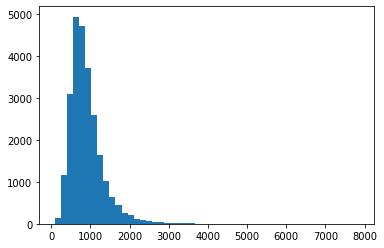

In [21]:
recipes_lengths = []
for recipe_text in dataset_stringified:
    recipes_lengths.append(len(recipe_text))

    
plt.hist(recipes_lengths, bins=50)
plt.show()

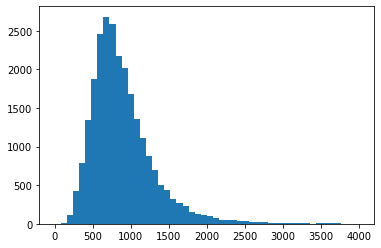

In [22]:
plt.hist(recipes_lengths, range=(0, 4000), bins=50)
plt.show()

In [23]:
MAX_RECIPE_LENGTH = 1000

In [24]:
def filter_recipes_by_length(recipe_test):
    return len(recipe_test) <= MAX_RECIPE_LENGTH 

dataset_filtered = [recipe_text for recipe_text in dataset_stringified if filter_recipes_by_length(recipe_text)]

print('Dataset size BEFORE filtering: ', len(dataset_stringified))
print('Dataset size AFTER filtering: ', len(dataset_filtered))
print('Number of eliminated recipes: ', len(dataset_stringified) - len(dataset_filtered))

Dataset size BEFORE filtering:  24955
Dataset size AFTER filtering:  17384
Number of eliminated recipes:  7571


In [25]:
TOTAL_RECIPES_NUM = len(dataset_filtered)

print('MAX_RECIPE_LENGTH: ', MAX_RECIPE_LENGTH)
print('TOTAL_RECIPES_NUM: ', TOTAL_RECIPES_NUM)

MAX_RECIPE_LENGTH:  1000
TOTAL_RECIPES_NUM:  17384
